<a href="https://colab.research.google.com/github/Landonishere/PatternFlow/blob/topic-recognition/PatternFlow/recognition/s4565093/%E2%80%9CYOLOv3_LLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cloning and Building Darknet
The following cells will clone darknet from AlexeyAB's famous repository, adjust the Makefile to enable OPENCV and GPU for darknet and then build darknet.


In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

fatal: destination path 'darknet' already exists and is not an empty directory.


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

[Errno 20] Not a directory: 'darknet'
/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [ ]:
# make darknet (build)
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_opencv.cpp:1150:10: note: ...thi

# Download pretrained YOLOv3 weights


In [ ]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2021-10-30 06:22:30--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  95.3MB/s    in 2.5s    

2021-10-30 06:22:33 (95.3 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

### Connect to Google Drive

In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


In [ ]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

'Colab Notebooks'		     'My Drive'
 darknet			      yolo3
 ISIC2018_Task1-2_Training_Input_x2   yolov3
 keras_png_slices_data		      yolov3_custom3_last.weights（副本）


#  Moving all files Into my Cloud VM


In [ ]:
# this is where my zip is stored (I created a yolov3 folder where I will get my required files from)
!ls /mydrive

'Colab Notebooks'		     'My Drive'
 darknet			      yolo3
 ISIC2018_Task1-2_Training_Input_x2   yolov3
 keras_png_slices_data		      yolov3_custom3_last.weights（副本）


In [ ]:
# copy the .zip file into the root directory of cloud VM
!cp /mydrive/yolov3/obj.zip /content/darknet/data

In [ ]:
# copy the test.zip file into the root directory of cloud VM
!cp /mydrive/yolov3/test.zip /content/darknet/data

In [ ]:
# unzip the zip file and its contents should now be in /darknet/data/obj
!unzip /content/gdrive/MyDrive/yolov3/obj.zip -d /content/darknet/data

流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: /content/darknet/data/obj/ISIC_0000103.jpg  
  inflating: /content/darknet/data/obj/ISIC_0000103.txt  
  inflating: /content/darknet/data/obj/ISIC_0000104.jpg  
  inflating: /content/darknet/data/obj/ISIC_0000104.txt  
  inflating: /content/darknet/data/obj/ISIC_0000105.jpg  
  inflating: /content/darknet/data/obj/ISIC_0000105.txt  
  inflating: /content/darknet/data/obj/ISIC_0000107.jpg  
  inflating: /content/darknet/data/obj/ISIC_0000107.txt  
  inflating: /content/darknet/data/obj/ISIC_0000108.jpg  
  inflating: /content/darknet/data/obj/ISIC_0000108.txt  
  inflating: /content/darknet/data/obj/ISIC_0000109.jpg  
  inflating: /content/darknet/data/obj/ISIC_0000109.txt  
  inflating: /content/darknet/data/obj/ISIC_0000110.jpg  
  inflating: /content/darknet/data/obj/ISIC_0000110.txt  
  inflating: /content/darknet/data/obj/ISIC_0000111.jpg  
  inflating: /content/darknet/data/obj/ISIC_0000111.txt  
  inflating: /content/darknet/data/obj/ISIC_0

In [ ]:
!unzip /content/gdrive/MyDrive/yolov3/test.zip -d  /content/darknet/data

Archive:  /content/gdrive/MyDrive/yolov3/test.zip
   creating: /content/darknet/data/test/
  inflating: /content/darknet/data/test/ISIC_0000003.jpg  
  inflating: /content/darknet/data/test/ISIC_0000003_S.txt  
  inflating: /content/darknet/data/test/ISIC_0000012.jpg  
  inflating: /content/darknet/data/test/ISIC_0000012_S.txt  
  inflating: /content/darknet/data/test/ISIC_0000013.jpg  
  inflating: /content/darknet/data/test/ISIC_0000013_S.txt  
  inflating: /content/darknet/data/test/ISIC_0000014.jpg  
  inflating: /content/darknet/data/test/ISIC_0000014_S.txt  
  inflating: /content/darknet/data/test/ISIC_0000015.jpg  
  inflating: /content/darknet/data/test/ISIC_0000015_S.txt  
  inflating: /content/darknet/data/test/ISIC_0000020.jpg  
  inflating: /content/darknet/data/test/ISIC_0000020_S.txt  
  inflating: /content/darknet/data/test/ISIC_0000022.jpg  
  inflating: /content/darknet/data/test/ISIC_0000022_S.txt  
  inflating: /content/darknet/data/test/ISIC_0000023.jpg  
  inflatin

# Change Configuring Files for Training


In [ ]:
# download cfg to google drive and change its name
!cp cfg/yolov3.cfg /mydrive/yolov3/yolov3_custom2.cfg

In [ ]:
# to download to local machine (change its name to yolov3_custom.cfg once you download)
download('cfg/yolov3.cfg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



For**batch = 64** and **subdivisions = 16** for ultimate results. If you run into any issues then up subdivisions to 32.

 I set my **max_batches = 4000**, **steps = 3200, 3600**, I changed the **classes = 1** in the three YOLO layers and **filters = 18** in the three convolutional layers before the YOLO layers. 




In [ ]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /content/gdrive/MyDrive/yolov3/yolov3_custom3.cfg /content/darknet/cfg

# upload the custom .cfg back to cloud VM from local machine (uncomment to use)
#%cd cfg
#upload()
#%cd .. 

# Create obj.names and obj.data 
obj.data file is used to save the path of train dataset and test dataset.
obj,name file is the class of image.In this project, only "lesions" is ok

In [ ]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /content/gdrive/MyDrive/yolov3/obj.data /content/darknet/data
!cp /content/gdrive/MyDrive/yolov3/obj.name  /content/darknet/data
# upload the obj.names and obj.data files to cloud VM from local machine (uncomment to use)
#%cd data
#upload()
#%cd .. 

## Generating train.txt and test.txt
The last configuration file needed before we can begin to train our custom detector is the train.txt file and test.txt file which hold the relative paths to all our train and test images.

In [ ]:
# upload the generate_train.py script to cloud VM from Google Drive
!cp /content/gdrive/MyDrive/yolov3/generate_test.py /content/darknet

# upload the generate_train.py script to cloud VM from local machine (uncomment to use)
#upload()


In [ ]:
!rm -rf /content/data

In [ ]:
# upload the generate_test.py script to cloud VM from Google Drive
!cp /content/gdrive/MyDrive/yolov3/generate_test.py /content/darknet

Now we simply run the python script to do all the work for us.

In [ ]:
!python /content/darknet/generate_train.py

In [ ]:
!python /content/darknet/generate_test.py

In [ ]:
# verify train.txt can be seen in our darknet/data folder
!ls /content/darknet/data

9k.tree     giraffe.jpg		      labels	openimages.names  test.zip
coco9k.map  goal.txt		      obj	person.jpg	  voc.names
coco.names  horses.jpg		      obj.data	scream.jpg
dog.jpg     imagenet.labels.list      obj.name	test
eagle.jpg   imagenet.shortnames.list  obj.zip	test.txt


#  Download pre-trained weights for the convolutional layers.
This step downloads the weights for the convolutional layers of the YOLOv3 network. By using these weights it helps your custom object detector to be way more accurate and not have to train as long. You don't have to use these weights but trust me it will help your modle converge and be accurate way faster. USE IT!

In [ ]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

URL transformed to HTTPS due to an HSTS policy
--2021-10-30 06:27:45--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   105MB/s    in 1.5s    

2021-10-30 06:27:46 (105 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



#Train the Custom Object Detector!

In [ ]:
# train your custom detector
!./darknet detector train data/obj.data cfg/yolov3_custom3.cfg darknet53.conv.74 -dont_show

流式输出内容被截断，只能显示最后 5000 行内容。
 total_bbox = 247837, rewritten_bbox = 0.000000 % 

 3926: 0.088586, 0.103208 avg loss, 0.000010 rate, 5.470399 seconds, 251264 images, 0.172530 hours left
Loaded: 0.000051 seconds
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.799922), count: 3, class_loss = 0.322512, iou_loss = 0.140843, total_loss = 0.463355 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.796558), count: 1, class_loss = 0.139221, iou_loss = 0.030072, total_loss = 0.169293 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000012, iou_loss = 0.000000, total_loss = 0.000012 
 total_bbox = 247841, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.863406), count: 4, class_loss = 0.810068, iou_loss = 0.081452, total_loss = 0.891520 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 9

After training, we can print its loss chart. When the loss lower than 1.0. It can be used to predict. 

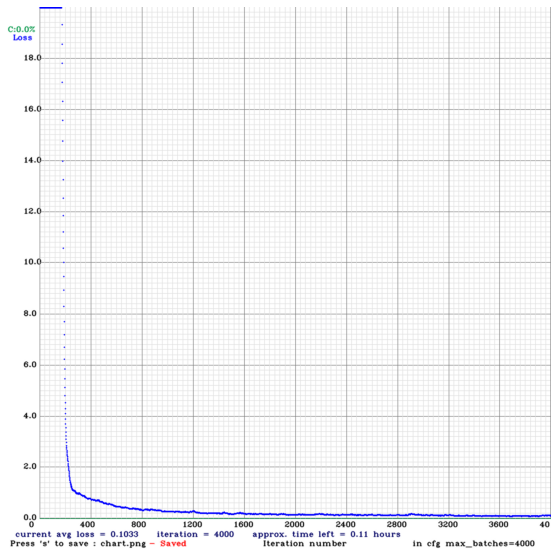

In [ ]:
imShow('chart.png')

# Pick up one test image to predict.!

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut

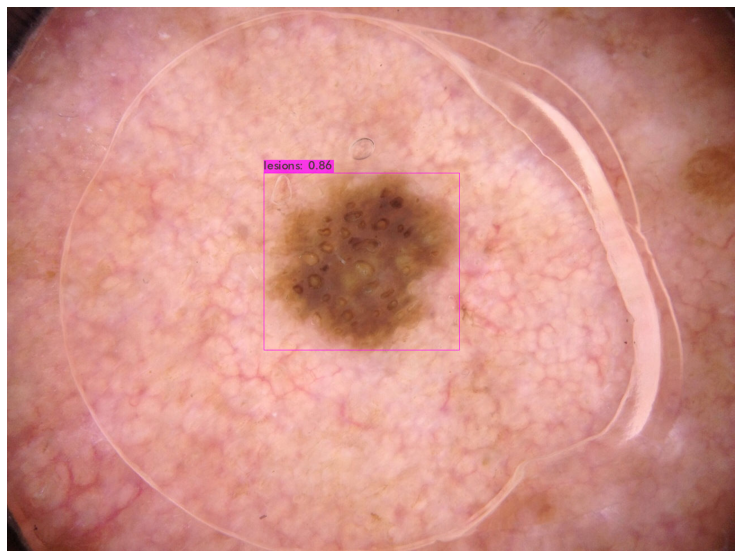

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!/content/darknet/darknet detector test /content/darknet/data/obj.data /content/darknet/cfg/yolov3_custom3.cfg /content/gdrive/MyDrive/yolov3/backup/yolov3_custom3_last.weights /content/gdrive/MyDrive/yolov3/a1.jpg -thresh 0.8
imShow('predictions.jpg')

In [ ]:
!/content/darknet/darknet detector map /content/darknet/data/obj.data /content/darknet/cfg/yolov3_custom3.cfg /content/gdrive/MyDrive/yolov3/backup/yolov3_custom3_last.weights 


 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut

In [ ]:
!/content/darknet/darknet detector test /content/darknet/data/obj.data /content/darknet/cfg/yolov3_custom3.cfg /content/gdrive/MyDrive/yolo_v3/backup/yolov3_custom3_last.weights -ext_output -dont_show </content/darknet/data/test.txt> result.txt

/bin/bash: /content/darknet/darknet detector test /content/darknet/data/obj.data /content/darknet/cfg/yolov3_custom3.cfg /content/gdrive/MyDrive/yolo_v3/backup/yolov3_custom3_last.weights -ext_output -dont_show : No such file or directory


In [ ]:
!/content/darknet/darknet detector map /content/darknet/data/obj.data /content/darknet/cfg/yolov3_custom3.cfg /content/gdrive/MyDrive/yolov3/backup/yolov3_custom3_last.weights -points 11

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut

In [ ]:
!./darknet detector recall data/obj.data cfg/yolov3_custom3.cfg /mydrive/yolov3/backup/yolov3_custom3_last.weights -points 11

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut

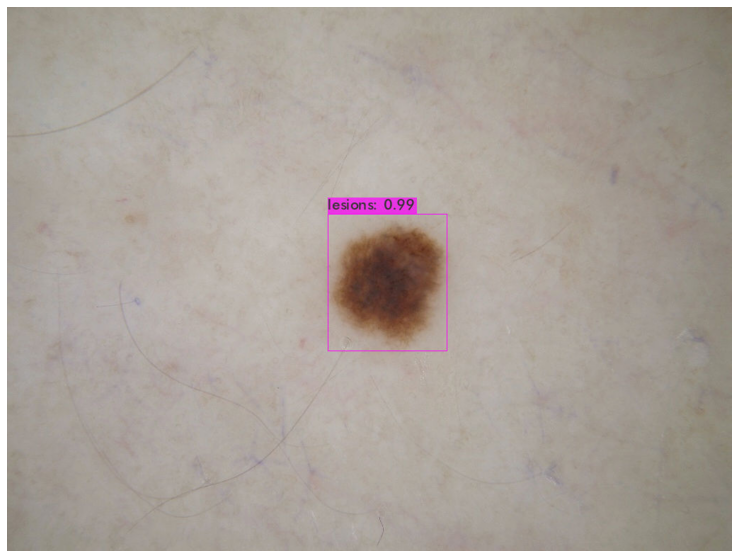

In [ ]:
!./darknet detector test data/obj.data cfg/yolov3_custom3.cfg /mydrive/yolov3/backup/yolov3_custom3_last.weights /content/darknet/data/test/ISIC_0012560.jpg -thresh 0.3
imShow('predictions.jpg')